<a href="https://colab.research.google.com/github/kenwkliu/ideas/blob/master/colab/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Execute this block to start importing the libraries and helper functions

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

from string import punctuation
import numpy as np

import nltk
from nltk.corpus import gutenberg
from nltk.data import find
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('word2vec_sample')

import gensim
from gensim.models import word2vec

import tensorflow as tf
import tensorboard as tb
from tensorboard.plugins import projector
from torch.utils.tensorboard import SummaryWriter
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
%load_ext tensorboard

In [ ]:
#@title Choose a text corpus for the model training

import ipywidgets as widgets
from IPython.display import display

# Display the Gutenberg text corpus drop down
corpus = widgets.Dropdown(
    description="Text Corpus", 
    options=gutenberg.fileids(),
    value = 'bible-kjv.txt'
)

display(corpus) 

In [ ]:
#@title Print the first few lines from the text

lines = 10 #@param {type:"integer"}

# get the KJV Bible
bible_kjv_sents = gutenberg.sents(corpus.value) 

# preprocess the dataset
preprocessed = [[word.lower() for word in sent if word not in punctuation] for sent in bible_kjv_sents]

# Print the Bible first 10 lines 
[print(preprocessed[i]) for i in range(lines)]
print("\n No. of sentences: ", len(preprocessed))

In [ ]:
#@title Run the word2vec model with the following parameters

min_count = 5 #@param {type:"integer"}
dimension = 32 #@param {type:"integer"}
window_size = 5 #@param {type:"slider", min:1, max:20, step:1}

# Generate Bible word2vec by gensim
bibleModel = word2vec.Word2Vec(preprocessed, min_count=min_count, size=dimension, window=window_size)
bibleW2V = bibleModel.wv

print("No.of words:", len(bibleW2V.vocab))

What is God ?

In [ ]:
bibleW2V.most_similar('god')

What is Jesus ?

In [ ]:
bibleW2V.most_similar('jesus')

Load the pre-trained Google News word2vec

In [ ]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
newsW2V = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False).wv

print("No.of words:", len(newsW2V.vocab))

#Each word is represented in the space of 300 dimensions:
print("Model dimension:", newsW2V.vector_size)

What is university ?


In [ ]:
newsW2V.most_similar('university')

Which is the most dissimilar? (breakfast, cereal, dinner, lunch)

In [ ]:
newsW2V.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])

woman + king - man = ?

In [ ]:
newsW2V.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

Paris + Germany - Berlin = ?

In [ ]:
newsW2V.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

Visualize the Word2Vec model

In [ ]:
# Write the w2v model to files
vectors = np.array(bibleW2V.vectors)
metadata = bibleW2V.index2word

writer = SummaryWriter('bibleW2V')
writer.add_embedding(vectors, metadata)
writer.close()

# show the embedding projector
%tensorboard --logdir=bibleW2V
%tensorboard --logdir=bibleW2V

In [ ]:
# show the word vector
word = 'god'
print(bibleW2V.wv[word])
print("Dimension:", len(bibleW2V.wv[word]))

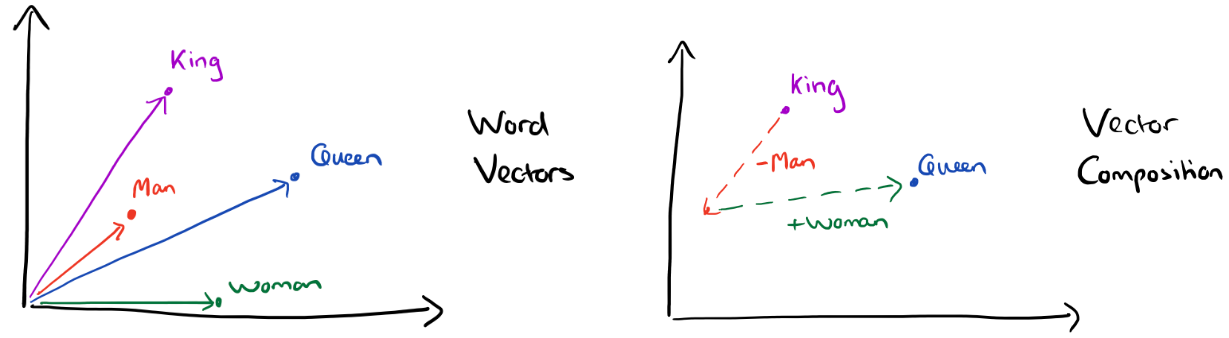